In [1]:
## Relevant Package Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

<h1 id="header">Data Exploration</h1>

In [2]:
#Import Data from cluster.csv
db = pd.read_csv('cluster.csv')
db.shape #initial shape of the dataset is (15589, 21)
db[db.duplicated(keep = False)] #3 duplicated entries are shown and will require cleaning. 
db.drop_duplicates(inplace = True) #we can consider dropping these duplicates due to the exact name, type of travel, year of birth and reward points. This is further illustrated in the report.
db.index = range(15586)
db #non duplicated dataset now has a new shape (15586, 21)

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15582,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15583,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4
15584,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,5,4,5,5,2,5,4,3,4,5


In [3]:
db.info() #Missing values present in Year_Birth. Input method to be discussed, potential methods would be median(), mean() or KNN-imputer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15586 non-null  object 
 1   Name               15586 non-null  object 
 2   Longevity          15586 non-null  object 
 3   Year_Birth         15391 non-null  float64
 4   TypeTravel         15586 non-null  object 
 5   RoomType           15586 non-null  object 
 6   RewardPoints       15586 non-null  int64  
 7   Comfort            15586 non-null  int64  
 8   ReceptionSchedule  15586 non-null  int64  
 9   FoodDrink          15586 non-null  int64  
 10  Location           15586 non-null  int64  
 11  Wifi               15586 non-null  int64  
 12  Amenities          15586 non-null  int64  
 13  Staff              15586 non-null  int64  
 14  OnlineBooking      15586 non-null  int64  
 15  PriceQuality       15586 non-null  int64  
 16  RoomSpace          155

In [4]:
db.describe().T #Out of every variable, the most subjective one (albeit a numerical variable) is RewardPoints. Little to no information is given.
#Although the scaling system is attributed from 0-5, some inputs have entry values starting from 1 and others from 0.
#Should we normalize or create an average value, 0's will turn into 1's as the lowest rank of the interval.
#Wifi is also ranked from 0-6, so we will change it to 1-5.

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15391.0,1981.705607,15.179757,1936.0,1970.0,1981.0,1994.00,2014.0
RewardPoints,15586.0,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0
Comfort,15586.0,2.841332,1.388541,0.0,2.0,3.0,4.00,5.0
ReceptionSchedule,15586.0,2.997049,1.519035,0.0,2.0,3.0,4.00,5.0
FoodDrink,15586.0,2.844412,1.436937,0.0,2.0,3.0,4.00,5.0
Location,15586.0,2.985821,1.299438,1.0,2.0,3.0,4.00,5.0
Wifi,15586.0,3.244963,1.327064,0.0,2.0,3.0,4.00,6.0
Amenities,15586.0,3.374631,1.352419,0.0,2.0,4.0,4.00,5.0
Staff,15586.0,3.506288,1.319625,1.0,3.0,4.0,5.00,5.0
OnlineBooking,15586.0,3.454190,1.310401,0.0,2.0,4.0,5.00,5.0


In [5]:
db['Comfort'] = db['Comfort'].replace(0,1)
db['Comfort'].value_counts()

3    3498
4    3475
2    3452
1    3061
5    2100
Name: Comfort, dtype: int64

In [6]:
db['ReceptionSchedule'] = db['ReceptionSchedule'].replace(0,1)
db['ReceptionSchedule'].value_counts()

4    3633
1    3260
5    3171
3    2797
2    2725
Name: ReceptionSchedule, dtype: int64

In [7]:
db['FoodDrink'] = db['FoodDrink'].replace(0,1)
db['FoodDrink'].value_counts()

3    3406
4    3324
2    3282
1    3221
5    2353
Name: FoodDrink, dtype: int64

In [8]:
db['Wifi'] = db['Wifi'].replace(0,1)
db['Wifi'] = db['Wifi'].replace(6,5)
db['Wifi'].value_counts()

4    3703
5    3481
3    3347
2    3245
1    1810
Name: Wifi, dtype: int64

In [9]:
db['Amenities'] = db['Amenities'].replace(0,1)
db['Amenities'].value_counts()

4    4962
5    3583
3    2931
2    2307
1    1803
Name: Amenities, dtype: int64

In [10]:
db['OnlineBooking'] = db['OnlineBooking'].replace(0,1)
db['OnlineBooking'].value_counts()

4    4696
5    4054
3    2779
2    2391
1    1666
Name: OnlineBooking, dtype: int64

In [11]:
db['RoomSpace'] = db['RoomSpace'].replace(0,1)
db['RoomSpace'].value_counts()

4    4785
5    4044
3    2701
2    2624
1    1432
Name: RoomSpace, dtype: int64

In [12]:
db['BarService'] = db['BarService'].replace(0,1)
db['BarService'].value_counts()

4    4201
3    3675
5    3591
2    2272
1    1847
Name: BarService, dtype: int64

#### People who give same value in every category
Only 3: shouldn't be a problem

In [13]:
len(db[db.loc[:,'Comfort':'BarService'].apply(lambda x:min(x)==max(x),1)])

3

In [14]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15391.0,1981.705607,15.179757,1936.0,1970.0,1981.0,1994.00,2014.0
RewardPoints,15586.0,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0
Comfort,15586.0,2.878160,1.324472,1.0,2.0,3.0,4.00,5.0
ReceptionSchedule,15586.0,3.046837,1.433989,1.0,2.0,3.0,4.00,5.0
FoodDrink,15586.0,2.891313,1.357447,1.0,2.0,3.0,4.00,5.0
Location,15586.0,2.985821,1.299438,1.0,2.0,3.0,4.00,5.0
Wifi,15586.0,3.243809,1.320734,1.0,2.0,3.0,4.00,5.0
Amenities,15586.0,3.398755,1.299903,1.0,2.0,4.0,4.00,5.0
Staff,15586.0,3.506288,1.319625,1.0,3.0,4.0,5.00,5.0
OnlineBooking,15586.0,3.454318,1.310112,1.0,2.0,4.0,5.00,5.0


In [15]:
db.skew() #Moderate Skew (over |0.5|) for Staff, CheckOut and Cleanliness. All negative, representing left-tailed distributions, but the skewness values are not very high.
#We should explore the type of curves presented here, as their skewness might suggest that these services are the "best" ones out of the assessed ones.
#However, upon checking the detailed view, their mean and median values are higher than 3.

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_79640/1515479867.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db.skew() #Moderate Skew (over |0.5|) for Staff, CheckOut and Cleanliness. All negative, representing left-tailed distributions, but the skewness values are not very high.


Year_Birth          -0.003724
RewardPoints        -0.453744
Comfort              0.065083
ReceptionSchedule   -0.093768
FoodDrink            0.063672
Location            -0.050057
Wifi                -0.175043
Amenities           -0.455664
Staff               -0.554468
OnlineBooking       -0.471207
PriceQuality        -0.503290
RoomSpace           -0.460433
CheckOut            -0.750667
Checkin             -0.382822
Cleanliness         -0.745109
BarService          -0.357433
dtype: float64

In [16]:
# Acho que temos de organizar melhor isto. A skweeness ajuda-nos a perceber ou analisar se existem possíveis outliers. Acho que
# isto foi realizado por nós individualmente na parte da exploração e muito do material não consta aqui.

# - Avaliear se haviam outliers na medida em que são pessoas que dão o mesmo valor nas variáveis de satisfação (está em cima)
# - Outliers noutras variáveis que podem ter uma kurtosis/skweeness maior

# Acho que se estamos a explorar as variáveis numéricas, não deveremos "esperar" pelo final do documento para obter uma matriz
# de correlação. Devemos fazer logo aqui e tirar conclusões desde logo. No final voltaríamos a fazer depois de já ter o data
# frame todo "pronto", não me parece mal, mas não se deve deixar para o fim na minha opinião. Faz parte até da exploração visual
# dessas mesmas variáveis.

In [17]:
#db['Staff'].value_counts()
#db['CheckOut'].median()
#db['Cleanliness'].describe()

In [18]:
db[['Staff','CheckOut','Cleanliness']].kurt() #Values for kurtosis are within reason, so no specific outliers.

Staff         -0.859138
CheckOut      -0.225208
Cleanliness   -0.225374
dtype: float64

In [19]:
db.describe(include="O").T #For better analysis, categorical values should be transposed to 0s and 1s, to enable plotting.

,count,unique,top,freq
Churn,15586,2,nochurn,8475
Name,15586,14227,Mr. Michael Smith,9
Longevity,15586,3,yes,12545
TypeTravel,15586,2,business,10754
RoomType,15586,3,single,7442


In [20]:
db['Longevity'] = db['Longevity'].replace('y','yes') #Yes and y both show as different values, will be changed into "yes"
db['Longevity'] = db['Longevity'].replace('yes',1).replace('no',0)
db['Longevity'].value_counts()

1    12712
0     2874
Name: Longevity, dtype: int64

In [21]:
db['Churn'] = db['Churn'].replace('churn',1).replace('nochurn',0)
db['Churn'].value_counts()

0    8475
1    7111
Name: Churn, dtype: int64

In [22]:
db['TypeTravel'] = db['TypeTravel'].replace('business',1).replace('leisure',0) #1 will represent business and 0 will represent leisure
db['TypeTravel'].value_counts()

1    10754
0     4832
Name: TypeTravel, dtype: int64

In [23]:
# Isto é uma variável categórica não binária. Não podemos fazer isto, temos de criar dummy variables.

#db['RoomType'] = db['RoomType'].replace('single',0).replace('double',1).replace('suite',2)
#db['RoomType'].value_counts() #singles will be represented by 0s, doubles by 1s and suites by 2s.

In [24]:
gender = db['Name'].str.split(' ',expand = True,n=1)[0]
db['Gender'] = gender
db['Gender'] = db['Gender'].replace('Ms.',0).replace('Mr.',1)
#db['Gender']=db['Gender'].map({'Ms.': 'F', 'Mr.': 'M'}) could also be used
#We replace Female with 0 and Male with 1 to apply KNN later on.
# A verdade é que estamos desde já a criar as dummy variables, e podemos fazer desta forma para Churn, TypeTravel e Gender pois
# são variáveis categóricas binárias.

db['Gender'].value_counts()

0    7982
1    7604
Name: Gender, dtype: int64

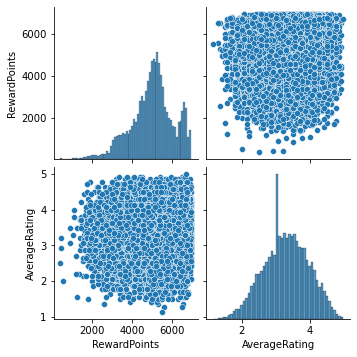

In [25]:
rating = ((db['Comfort'] + db['ReceptionSchedule'] + db['FoodDrink'] + db['Location'] + db['Wifi'] + db['Amenities'] + db['Staff'] + db['OnlineBooking'] + db['PriceQuality'] + db['RoomSpace'] + db['CheckOut'] + db['Checkin'] + db['Cleanliness'] + db['BarService'])/14)
db['AverageRating'] = rating.round(2)
db

rec = db.loc[db.Churn == 0, 'AverageRating']
rec.value_counts()
#rec1.rename(columns = {'Name':'Recurrent'}, inplace = True)
#rec1.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
#rec1

#db['AverageRating'].median() #median and mode are both above 3.3
#We can also bucket Ratings (from under 1, 1-2, 2-3 as detractors, 3-4 as neutral and over 4 as supporters) to see how people behave under each scenario (NPS score 8)

#Exploring RewardPoints with (transformed) categorical variables
db_subset1 = db[['RewardPoints', 'AverageRating']].copy()
sns.pairplot(db_subset1)

In [26]:
# Create 3 distinct buckets of rating variables
db['Staff_Related'] = round((db['ReceptionSchedule'] + db['Staff'] + db['OnlineBooking'] + db['CheckOut'] + db['Checkin'])/5,2)
db['Room_Related'] = round((db['Comfort'] + db['Amenities'] + db['RoomSpace'] + db['Cleanliness'])/4,2)
db['Bar_Related'] = round((db['FoodDrink'] + db['Wifi'] + db['BarService'])/3,2)

In [27]:
#Recurrent Visits - exploration
#This is aimed at getting more insight about recurrent visits and how they would affect RewardPoints

recur1 =  pd.DataFrame(db.groupby(['Name', 'Year_Birth'])['Name'].count())
recur1.rename(columns = {'Name':'Recurrent'}, inplace = True)
recur1.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
recur1

#39 clients have the same name and year of birth, meaning that they might be recurrent visits.

recur2 =  pd.DataFrame(db.groupby(['Name', 'Year_Birth', 'Longevity'])['Name'].count())
recur2.rename(columns = {'Name':'Recurrent'}, inplace = True)
recur2.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
recur2

#26 of those clients have the same Longevity status, meaning that enough time has passed on 13 clients to change the Longevity status from 0 to 1.

recur3 =  pd.DataFrame(db.groupby(['Name', 'Year_Birth', 'Longevity', 'RoomType'])['Name'].count())
recur3.rename(columns = {'Name':'Recurrent'}, inplace = True)
recur3.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
recur3

#13 of those clients have kept the same RoomType and Longevity. They can potentially be the same people.

recur4 =  pd.DataFrame(db.groupby(['Name', 'Year_Birth', 'Longevity', 'RoomType', 'RewardPoints'])['Name'].count())
recur4.rename(columns = {'Name':'Recurrent'}, inplace = True)
recur4.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
recur4

#No client has the same amount of RewardPoints, meaning that they change according to the number of visits.
#On average, RewardPoints varies 697 points [from 30 to 1892] or 165 [from -645 to 1892]

#db.loc[db.Name == "Ms. Danielle Taylor"]
#For Anthony Smith (1982) - 4508/5275/5554, Business Single and Suite
#For Brian Smith (1979) - 4478/4567, Business Single
#For Christopher Murphy (1979) - 6367/6152, Business Single
#For Jason Bell (1996) - 4539/3404, Business Single
#For John Russel (1977) - 3645/4013, Business Single
#For John Schwartz (1980) - 5607/5577, Business Double
#For Joseph Thomas (1970) - 5051/6570, Business Single
#For Michael Miller (1992) - 3907/4442, Business Single
#For Timothy Lee (1980) - 5113/3221, Business Single - Churn
#For Amanda Smith (1962) - 6190/3906, Business Double - Churn and Business Single
#For Amanda Smith (1969) - 6577/6655, Business Single
#For Cynthia Martin (1991) 4939/4456, Business Single - Churn
#For Dana Anderson (1972) 5807/6452, Business Double
#For Danielle Taylor (1981) 5147/4990, Business Double

,,,,,Recurrent
Name,Year_Birth,Longevity,RoomType,RewardPoints,


In [28]:
db_copy = db.drop(columns = ['Name','FoodDrink', 'ReceptionSchedule','Comfort', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService'], axis=1)
db_copy
#db

#We now have 2 db sets, one which is the original (db) and can be used to infer more information about each of the ratings (useful for our proposed 3rd perspective)
#And db_copy, which is a trimmed down version of our original db, with an average rating score.

,Churn,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Gender,AverageRating,Staff_Related,Room_Related,Bar_Related
0,1,1,1974.0,1,single,4907,0,3.29,3.6,3.00,3.00
1,0,1,1965.0,1,single,6724,1,3.14,3.2,3.50,2.67
2,1,1,1973.0,1,single,4365,1,2.71,3.0,3.00,1.67
3,0,1,1993.0,0,double,3849,0,3.14,3.6,3.25,2.67
4,0,1,1989.0,1,single,5376,1,3.57,3.4,3.25,4.33
...,...,...,...,...,...,...,...,...,...,...,...
15581,1,0,1988.0,1,double,4968,0,2.79,2.4,3.25,2.67
15582,1,0,2000.0,1,double,4970,0,3.57,4.0,2.75,4.33
15583,0,1,1964.0,1,single,4046,1,3.21,3.8,3.25,2.67
15584,0,1,1992.0,0,double,5155,1,4.07,4.0,4.25,4.67


In [29]:
# Create dummy variables for the column "RoomType"

db_copy = pd.get_dummies(db_copy)
db_copy

,Churn,Longevity,Year_Birth,TypeTravel,RewardPoints,Gender,AverageRating,Staff_Related,Room_Related,Bar_Related,RoomType_double,RoomType_single,RoomType_suite
0,1,1,1974.0,1,4907,0,3.29,3.6,3.00,3.00,0,1,0
1,0,1,1965.0,1,6724,1,3.14,3.2,3.50,2.67,0,1,0
2,1,1,1973.0,1,4365,1,2.71,3.0,3.00,1.67,0,1,0
3,0,1,1993.0,0,3849,0,3.14,3.6,3.25,2.67,1,0,0
4,0,1,1989.0,1,5376,1,3.57,3.4,3.25,4.33,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,1,0,1988.0,1,4968,0,2.79,2.4,3.25,2.67,1,0,0
15582,1,0,2000.0,1,4970,0,3.57,4.0,2.75,4.33,1,0,0
15583,0,1,1964.0,1,4046,1,3.21,3.8,3.25,2.67,0,1,0
15584,0,1,1992.0,0,5155,1,4.07,4.0,4.25,4.67,1,0,0


In [30]:
#Filled with KNN Imputer using NaN euclidean distance, with uniformed weighs and 5 neigbours.

#Possibly need to return KNN with sampling by Gender (81.5% females in the no reply bucket)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform", metric='nan_euclidean')
imputer.fit(db_copy)
db_KNN = imputer.transform(db_copy)
db_KNN = pd.DataFrame(db_KNN)
db_KNN[2] = db_KNN[2].round(0)
db_KNN[2].count

db_copy['Year_Birth'] = db_KNN[2]
db_copy['Year_Birth'].isna().value_counts()

False    15586
Name: Year_Birth, dtype: int64

In [31]:
#missingYB = pd.isnull(db['Year_Birth'])
#db[missingYB].query('Gender == 0') # out of 195 no reply in age, 159 are Female. We should adjust KNN accordingly.
#db[missingYB]

In [32]:
# Calculating the variable age, since now there are no missing values for the column "YearBirth" in the dataframe

from datetime import date

db_copy['Age'] = date.today().year - db_copy['Year_Birth']
db_copy

,Churn,Longevity,Year_Birth,TypeTravel,RewardPoints,Gender,AverageRating,Staff_Related,Room_Related,Bar_Related,RoomType_double,RoomType_single,RoomType_suite,Age
0,1,1,1974.0,1,4907,0,3.29,3.6,3.00,3.00,0,1,0,48.0
1,0,1,1965.0,1,6724,1,3.14,3.2,3.50,2.67,0,1,0,57.0
2,1,1,1973.0,1,4365,1,2.71,3.0,3.00,1.67,0,1,0,49.0
3,0,1,1993.0,0,3849,0,3.14,3.6,3.25,2.67,1,0,0,29.0
4,0,1,1989.0,1,5376,1,3.57,3.4,3.25,4.33,0,1,0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,1,0,1988.0,1,4968,0,2.79,2.4,3.25,2.67,1,0,0,34.0
15582,1,0,2000.0,1,4970,0,3.57,4.0,2.75,4.33,1,0,0,22.0
15583,0,1,1964.0,1,4046,1,3.21,3.8,3.25,2.67,0,1,0,58.0
15584,0,1,1992.0,0,5155,1,4.07,4.0,4.25,4.67,1,0,0,30.0


In [33]:
# Define bins for the variable "Reward Points" - bronze, silver, gold, platinum and applying ordinal encoding
# Replacing "RewardPoints" by "RewardPoints_Bins"

db_copy['RewardPoints_Bins'] = pd.cut(db_copy['RewardPoints'], 4, labels=[0, 1, 2, 3])
db_copy.drop(columns = ['RewardPoints'], axis=1, inplace=True)
db_copy

,Churn,Longevity,Year_Birth,TypeTravel,Gender,AverageRating,Staff_Related,Room_Related,Bar_Related,RoomType_double,RoomType_single,RoomType_suite,Age,RewardPoints_Bins
0,1,1,1974.0,1,0,3.29,3.6,3.00,3.00,0,1,0,48.0,2
1,0,1,1965.0,1,1,3.14,3.2,3.50,2.67,0,1,0,57.0,3
2,1,1,1973.0,1,1,2.71,3.0,3.00,1.67,0,1,0,49.0,2
3,0,1,1993.0,0,0,3.14,3.6,3.25,2.67,1,0,0,29.0,2
4,0,1,1989.0,1,1,3.57,3.4,3.25,4.33,0,1,0,33.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,1,0,1988.0,1,0,2.79,2.4,3.25,2.67,1,0,0,34.0,2
15582,1,0,2000.0,1,0,3.57,4.0,2.75,4.33,1,0,0,22.0,2
15583,0,1,1964.0,1,1,3.21,3.8,3.25,2.67,0,1,0,58.0,2
15584,0,1,1992.0,0,1,4.07,4.0,4.25,4.67,1,0,0,30.0,2


In [34]:
#From this point in exploration, we use db_copy for some visual exploration
db_copy.describe()
db_copy['Longevity'].value_counts()

1    12712
0     2874
Name: Longevity, dtype: int64

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

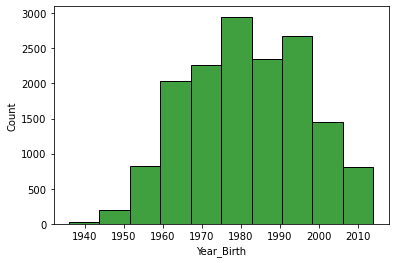

In [35]:
sns.histplot(db_copy['Year_Birth'], color="g", bins = 10)


<AxesSubplot:>

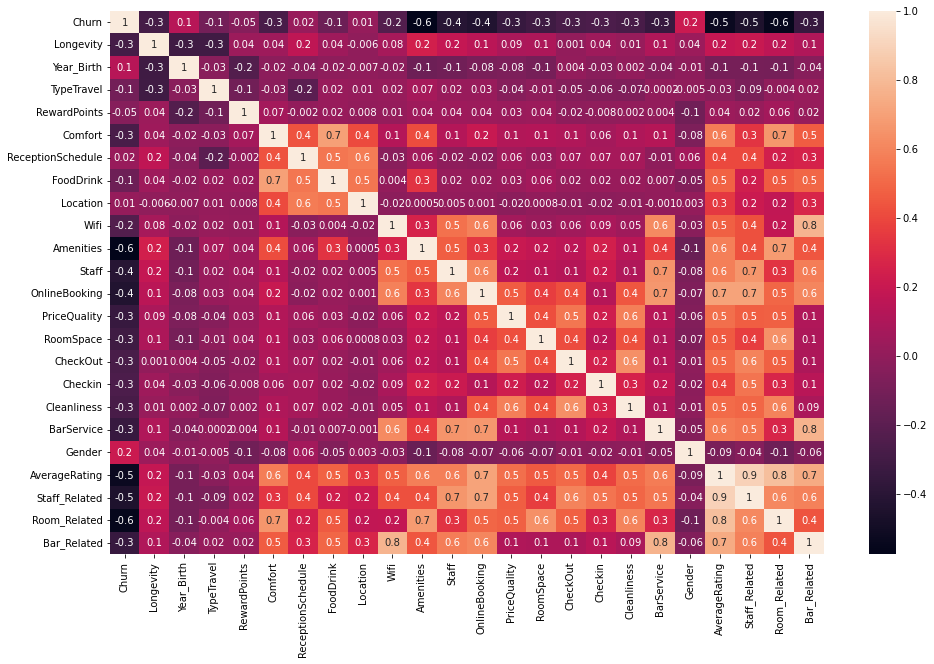

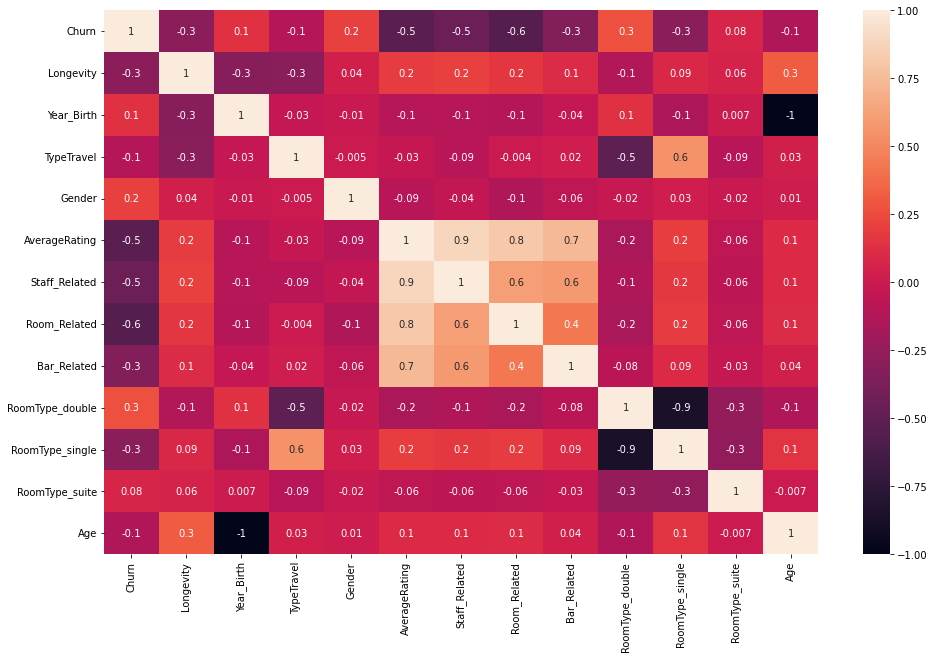

In [36]:
#Heatmap

# Não acho que faça muito sentido avaliarmos as correlações com variáveis categóricas que não sejam binárias. A ordem atribuída
# não é ordinal, é "aleatória". Talvez possamos melhorar isto :)

db_vis = db.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(db_vis, annot=True, fmt = '.1g')

db_visredux = db_copy.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(db_visredux, annot=True, fmt = '.1g') 

#Satisfaction "buckets"
#1 - Comfort, ReceptionSchedule, FoodDrink, Location
#2 - Amenities, Wifi, OnlineBooking, Staff, BarService
#3 - PriceQuality, RoomSpace, CheckOut, CheckIn, Cleanliness

#Insights
#Churn goes down with higher Average Rating (more specifically with Amenities, Staff and Online Booking)
#Customers who travel for business tend to book more single rooms
#Customers who book doubles and suites tend to churn more
#More recent customers (longevity = 0) tend to churn more
#Long-time customers (longevity =1) are more likely to be older and travel for business

# Phase 2

## Customer Satisfaction

## Customer Characteristics

In [37]:
# Penso que, a não ser por uma questão de explorar mais cuidadosamente algumas variáveis, não é necessário gerarmos dois
# dataframes distintos. No limite, as transformações que aplicamos a um deveríamos aplicar ao outro e não termos duas bases,
# mesmo que conheçamos as diferenças entre elas... Algumas coisas incluem aplicar o KNN, ter os Reward Points bins, calcular
# a idade que é muito mais intuitiva para avaliação e, consequentemente, fazer o drop do Year_Birh.
# É só uma opinião minha pois penso que promove a clareza na leitura tanto do notebook como, futuramente, do relatório. Penso
# que é complicar sem necessidade.
# Fiz algumas dessas transformações aqui.
# Outro tema a discutir com a professora é a aplicação da normalização. Eu sinto que é benéfico nesta perspetiva pelos ranges
# dos valores nas variáveis serem mais díspares. Temos de perceber se faz sentido aplicar a uma perspetiva e não às outras, se
# pode não fazer sentido aplicar, etc.

# Seleção das variáveis para a perspetiva "Customer Characteristics"

db_customer_characteristics = db_copy[['Gender','Age', 'TypeTravel', 'RoomType_double', 'RoomType_single', 'RoomType_suite', 'Longevity', 'RewardPoints_Bins']]
db_customer_characteristics

,Gender,Age,TypeTravel,RoomType_double,RoomType_single,RoomType_suite,Longevity,RewardPoints_Bins
0,0,48.0,1,0,1,0,1,2
1,1,57.0,1,0,1,0,1,3
2,1,49.0,1,0,1,0,1,2
3,0,29.0,0,1,0,0,1,2
4,1,33.0,1,0,1,0,1,3
...,...,...,...,...,...,...,...,...
15581,0,34.0,1,1,0,0,0,2
15582,0,22.0,1,1,0,0,0,2
15583,1,58.0,1,0,1,0,1,2
15584,1,30.0,0,1,0,0,1,2


In [38]:
# Normalize the data using MinMaxScaler
# The range of variables among this perspective may vary more significantly, so it's always a safe choice to perform this task

db_customer_characteristics_ready = MinMaxScaler().fit_transform(db_customer_characteristics)
db_customer_characteristics_ready

array([[0.        , 0.51282051, 1.        , ..., 0.        , 1.        ,
        0.66666667],
       [1.        , 0.62820513, 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.52564103, 1.        , ..., 0.        , 1.        ,
        0.66666667],
       ...,
       [1.        , 0.64102564, 1.        , ..., 0.        , 1.        ,
        0.66666667],
       [1.        , 0.28205128, 0.        , ..., 0.        , 1.        ,
        0.66666667],
       [1.        , 0.3974359 , 1.        , ..., 1.        , 1.        ,
        0.66666667]])

In [39]:
# Uma vez que o MinMaxScaler retorna como output um array e não um data frame, temos de criar a partir dele um novo data frame

cols = db_customer_characteristics.columns
db_customer_characteristics_ready = pd.DataFrame(db_customer_characteristics_ready, columns = cols)
db_customer_characteristics_ready

,Gender,Age,TypeTravel,RoomType_double,RoomType_single,RoomType_suite,Longevity,RewardPoints_Bins
0,0.0,0.512821,1.0,0.0,1.0,0.0,1.0,0.666667
1,1.0,0.628205,1.0,0.0,1.0,0.0,1.0,1.000000
2,1.0,0.525641,1.0,0.0,1.0,0.0,1.0,0.666667
3,0.0,0.269231,0.0,1.0,0.0,0.0,1.0,0.666667
4,1.0,0.320513,1.0,0.0,1.0,0.0,1.0,1.000000
...,...,...,...,...,...,...,...,...
15581,0.0,0.333333,1.0,1.0,0.0,0.0,0.0,0.666667
15582,0.0,0.179487,1.0,1.0,0.0,0.0,0.0,0.666667
15583,1.0,0.641026,1.0,0.0,1.0,0.0,1.0,0.666667
15584,1.0,0.282051,0.0,1.0,0.0,0.0,1.0,0.666667


In [40]:
# Aplicar o algoritmo de PCA para terminar o processo de Data Reduction já para esta perspetiva e analisar os resultados

from sklearn.decomposition import PCA

pca = PCA(n_components = 'mle' , svd_solver='full') # Minka’s MLE algorithm is used to guess the dimension
pca.fit(db_customer_characteristics_ready)

PCA(n_components='mle', svd_solver='full')

In [41]:
# Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right
# singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by explained_variance_.
# print(pca.components_) # dimensão: n_components x n_components

# The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of
# freedom.
# print(pca.explained_variance_) # dimensão: n_components

# Percentage of variance explained by each of the selected components.
print((pca.explained_variance_ratio_)*100) # dimensão: n_components

# Diria que não será necessariamente muito vantajoso aplicar o PCA, porque o nº de registos do dataframe é reduzido e não fará
# diferença na performance do modelo eliminar apenas 3 componentes. O número total de dimensões nesta perpestiva também é,
# desde logo, relativament pequena, o que não deverá afetar negativamente os algoritmos de clustering.

[43.80794742 19.88972655 16.16027946  7.86984226  6.01169388  4.05532275
  2.20518767]


In [42]:
# Aplicar K-means a esta perspetiva

from sklearn.cluster import KMeans

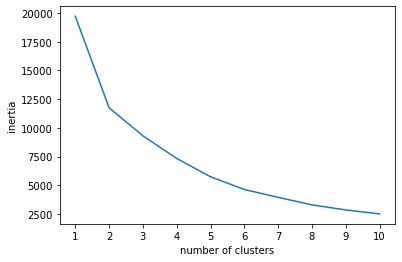

In [43]:
# Elbow Method

ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(db_customer_characteristics_ready)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

# Parece existir uma diminuição mais acentuada do declive para k = 2 com o elbow method.

In [44]:
# Dendogram - Hierarchical clustering

import scipy.cluster.hierarchy as shc

db_customer_characteristics_ready_hc = shc.linkage(db_customer_characteristics_ready) # aplica o algoritmo de hierachical clustering, por defeito a distância utilizada nos
                                                # cálculos é a distância euclideana
plt.figure(figsize =(40, 20))
plt.title('Visualising the data')
dendrogram_data = shc.dendrogram(db_customer_characteristics_ready_hc)

# Vendo o resultado do dendrograma de Hierarchical clustering, k = 3 pode ser um número adequado de clusters. Isto as linhas
# verticais do dendograma associadas a cada um dos clusters têm um comprimento relativamente grande.

Error in callback <function flush_figures at 0x0000020FB73B9DC0> (for post_execute):


KeyboardInterrupt: 

In [45]:
# By looking at the profile of each cluster more carefully, we will decide which is the best number of clusters more clearly.

# Apply K-means with k=2

db_customer_characteristics_ready_k2 = db_customer_characteristics_ready.copy()
model_cc_k2 = KMeans(n_clusters=2).fit(db_customer_characteristics_ready_k2)
# model_cc_k2 = KMeans(n_clusters=2, init = 'k-means++').fit(db_customer_characteristics_ready_k2)

# Com ou sem a inicialização do k-means++, o algoritmo aparenta convergir para uma solução muito próxima. Na verdade, a dimensão
# do data set é pequena, o que pode ajudar a explicar isto, mas também suporta a ideia de que 2 clusters sejam apropriados para
# esta perspetiva.

# Criar variável com label relacionada com assignment dos registos aos clusters

db_customer_characteristics_ready_k2['label'] = model_cc_k2.labels_

# Explorar o perfil dos clusters

db_customer_characteristics_ready_k2.groupby(['label']).mean().transpose()
#db_customer_characteristics_ready_k2.groupby(['label']).median().transpose()
#db_customer_characteristics_ready_k2.groupby(['label']).std().transpose()

#TypeTravel: leisure é 0, business é 1

label,0,1
Gender,0.496028,0.479150
Age,0.439596,0.387057
TypeTravel,0.959906,0.401195
RoomType_double,0.000000,0.932138
RoomType_single,0.923784,0.000000
RoomType_suite,0.076216,0.067862
Longevity,0.849553,0.779283
RewardPoints_Bins,0.721119,0.792032


In [46]:
# Check distances between clusters -> if within a cluster are only a few observations, perhaps they can be assigned to the
# nearest cluster; understand how different the clusters are

from sklearn.metrics.pairwise import euclidean_distances

dists = euclidean_distances(model_cc_k2.cluster_centers_)
dists

array([[0.        , 1.43090754],
       [1.43090754, 0.        ]])

In [47]:
# Apply K-means with k=3

db_customer_characteristics_ready_k3 = db_customer_characteristics_ready.copy()
#model_cc_k3 = KMeans(n_clusters=3).fit(db_customer_characteristics_ready_k3)
model_cc_k3 = KMeans(n_clusters=3, init = 'k-means++').fit(db_customer_characteristics_ready_k3)

# Com ou sem a inicialização do k-means++, o algoritmo aparenta convergir para uma solução muito próxima. Na verdade, a dimensão
# do data set é pequena, o que pode ajudar a explicar isto, mas também suporta a ideia de que 2 clusters sejam apropriados para
# esta perspetiva.

# Criar variável com label relacionada com assignment dos registos aos clusters

db_customer_characteristics_ready_k3['label'] = model_cc_k3.labels_

# Explorar o perfil dos clusters

db_customer_characteristics_ready_k3.groupby(['label']).mean().transpose()
#db_customer_characteristics_ready_k3.groupby(['label']).median().transpose()
#db_customer_characteristics_ready_k3.groupby(['label']).stdev().transpose()

#TypeTravel: leisure é 0, business é 1

label,0,1,2
Gender,0.452107,0.501196,0.489244
Age,0.361582,0.441276,0.403086
TypeTravel,1.000000,0.959346,0.000000
RoomType_double,0.964559,0.000000,0.886671
RoomType_single,0.000000,0.936690,0.000000
RoomType_suite,0.035441,0.063310,0.113329
Longevity,0.441252,0.861422,0.994899
RewardPoints_Bins,0.788101,0.720621,0.793894


In [48]:
# analisar com os valores do data set original, sem estarem normalizados.
# a classificaçáo para cada uma das linhas continua a ser a mesma e confirmamos a nossa análise.

db_customer_characteristics_k3 = db_customer_characteristics.copy()
db_customer_characteristics_k3['label'] = model_cc_k3.labels_

db_customer_characteristics_k3.groupby(['label']).mean().transpose()
#db_customer_characteristics_k3.groupby(['label']).median().transpose()
#db_customer_characteristics_k3.groupby(['label']).stdev().transpose()

# reward point bins não estão transformados numa variável numérica -> corrigir isto previamente para não haver este problema
# aqui. com a normalização funciona, mas caso contrário não.

label,0,1,2
Gender,0.452107,0.501196,0.489244
Age,36.203384,42.419509,39.440674
TypeTravel,1.000000,0.959346,0.000000
RoomType_double,0.964559,0.000000,0.886671
RoomType_single,0.000000,0.936690,0.000000
RoomType_suite,0.035441,0.063310,0.113329
Longevity,0.441252,0.861422,0.994899


In [49]:
# Check distances between clusters -> if within a cluster are only a few observations, perhaps they can be assigned to the
# nearest cluster; understand how different the clusters are

from sklearn.metrics.pairwise import euclidean_distances

dists = euclidean_distances(model_cc_k3.cluster_centers_)
dists

# O cluster mais próximo do cluster 0 é o 2
# O cluster mais próximo do cluster 1 é o 2
# O cluster mais próximo do cluster 2 é o cluster 1
# Logo, os clusters 0 e 1 são os que estão mais afastados

array([[0.        , 1.41423116, 1.14969298],
       [1.41423116, 0.        , 1.61592242],
       [1.14969298, 1.61592242, 0.        ]])

In [50]:
# Apply DBSCAN 

from sklearn.cluster import DBSCAN

In [51]:
db_customer_characteristics_ready_dbscan = db_customer_characteristics_ready.copy()
model_cc_dbscan = DBSCAN(eps = 1, min_samples = 15, metric='euclidean').fit(db_customer_characteristics_ready_dbscan)

# Os valores default são eps = 0.5 e min_samples = 5: neste caso, é retornado um elevado número de clusters (entre 15-20). Se
# olharmos para o dendograma, este resultado não parece "descabido" - temos também linhas verticais de maior comprimento que se-
# gregam os dados num número de clusters que cai dentro do range 15-20.
# Por uma questão de simplicidade, e olhando para os resultados dados pelo algoritmo de k-means, não faz sentido manter um
# número de clusters tão elevado. Por isso fez-se um "tuning" dos parâmetros eps e min_samples por forma a conseguir reduzir o
# número de clusters. Para eps = 1 e min_samples = 15, temos 3 clusters.
# O dados com a label -1 devem ser interpretados como noisy data que não estão em nenhum "high-density cluster"
# Há características comuns aos3 clusters gerados por k-means e por dbscan - age, rewardpoints, longevity, parecem não ser
# tão determinantes para a classificação. As variáveis relativas ao room type segregam bem os clusters em ambos os casos. O type
# travel segrega mais no caso do K-means.

db_customer_characteristics_ready_dbscan['label'] = model_cc_dbscan.labels_

db_customer_characteristics_ready_dbscan.groupby(['label']).mean().transpose()
#db_customer_characteristics_ready_dbscan.groupby(['label']).median().transpose()
#db_customer_characteristics_ready_dbscan.groupby(['label']).stdev().transpose()

label,-1,0,1,2
Gender,0.000000,0.501949,0.477418,0.460444
Age,0.589744,0.441943,0.385415,0.410313
TypeTravel,0.000000,0.956726,0.430403,0.545778
RoomType_double,0.000000,0.000000,1.000000,0.000000
RoomType_single,1.000000,1.000000,0.000000,0.000000
RoomType_suite,0.000000,0.000000,0.000000,1.000000
Longevity,0.000000,0.852170,0.763357,0.900444
RewardPoints_Bins,0.333333,0.714689,0.790996,0.802667


In [52]:
db_customer_characteristics_ready_dbscan2 = db_customer_characteristics_ready.copy()
model_cc_dbscan2 = DBSCAN(eps = 1.2, min_samples = 15, metric='euclidean').fit(db_customer_characteristics_ready_dbscan2)

db_customer_characteristics_ready_dbscan2['label'] = model_cc_dbscan2.labels_

db_customer_characteristics_ready_dbscan2.groupby(['label']).mean().transpose()
#db_customer_characteristics_ready_dbscan2.groupby(['label']).median().transpose()
#db_customer_characteristics_ready_dbscan2.groupby(['label']).stdev().transpose()

# assim, já não há elementos que sejam considerados noisy e temos 3 clusters bem definidos (eps = 1.2, min_samples = 10/15)
# por outro lado, não é fácil obter a combinação de parâmetros que gere apenas 2 clusters. por isso, sigo com 3 clusters para
# as seguintes análises, visto que até é possível identificar semelhanças entre estes clusters e os do k-means.

label,0,1,2
Gender,0.501881,0.477418,0.460444
Age,0.441963,0.385415,0.410313
TypeTravel,0.956598,0.430403,0.545778
RoomType_double,0.000000,1.000000,0.000000
RoomType_single,1.000000,0.000000,0.000000
RoomType_suite,0.000000,0.000000,1.000000
Longevity,0.852056,0.763357,0.900444
RewardPoints_Bins,0.714638,0.790996,0.802667


## Hotel Perspective

In [84]:
db_hotel = db.drop(columns = ['Name','Churn','RoomType','Longevity', 'Year_Birth','TypeTravel', 'RewardPoints', 'AverageRating', 'Staff_Related', 'Room_Related', 'Bar_Related','Gender'], axis=1)
print(db_hotel.shape)
db_hotel.head(5)

# db_hotel_normalized = MinMaxScaler().fit_transform(db_hotel)
# cols = db_hotel.columns
# db_hotel_normalized = pd.DataFrame(db_hotel_normalized, columns = cols)
# print(db_hotel_normalized.shape)
# db_hotel_normalized.head(5)

(15586, 14)


,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,3,4,1,4,4,3,4,3,3,3,3,4,3,4
1,1,1,1,1,5,3,4,5,5,5,5,1,5,2
2,3,3,3,3,1,4,4,3,3,2,3,2,3,1
3,1,1,1,1,4,4,5,4,4,4,4,4,4,3
4,2,2,3,2,5,5,5,5,5,3,4,1,3,5


In [85]:
# Aplicar o algoritmo de PCA para terminar o processo de Data Reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = 'mle' , svd_solver='full') # Minka’s MLE algorithm is used to guess the dimension
pca.fit(db_hotel)

PCA(n_components='mle', svd_solver='full')

In [86]:
# Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right
# singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by explained_variance_.

# The amount of variance explained by each of the selected components. Variance estimation: n_samples - 1 degrees of freedom
print("Number of Components: ",len(pca.explained_variance_),"\n") # dimensão: n_components
print(f"EigenValues: {list(map(lambda x: round(x,2),pca.explained_variance_))}\n")
print("% Variance explained by each of the selected components:")
print((pca.explained_variance_ratio_)*100,"\n") # dimensão: n_components
commulative = np.cumsum(pca.explained_variance_ratio_)
nComponents = np.argmax(commulative>0.85)
print(f"Sum of first {nComponents+1} components passes the 85% threshold: {round(sum(pca.explained_variance_ratio_[0:nComponents+1])*100,2)}%")
print(f"The first 3 components explain a total of {round(commulative[2]*100,2)}%")

Number of Components:  13 

EigenValues: [6.43, 4.7, 3.32, 1.73, 1.48, 1.06, 0.85, 0.79, 0.72, 0.59, 0.51, 0.5, 0.47]

% Variance explained by each of the selected components:
[27.37851877 20.041704   14.13168798  7.35811409  6.3010512   4.52501679
  3.64205787  3.36178757  3.07768528  2.50427302  2.18592617  2.11009998
  2.00919833] 

Sum of first 8 components passes the 85% threshold: 86.74%
The first 3 components explain a total of 61.55%


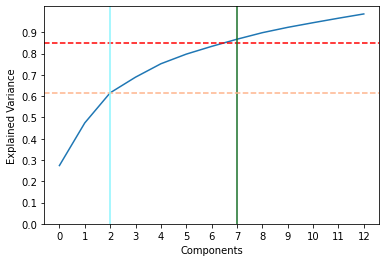

In [87]:
plt.plot(commulative)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.xticks(np.arange(0, len(pca.explained_variance_), step=1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.axhline(y = 0.85, color = 'r', linestyle = 'dashed')  
plt.axvline(x = nComponents, color = '#176e27')
plt.axhline(y = commulative[2], color = '#feb48c', linestyle = 'dashed')  
plt.axvline(x = 2, color = '#8cf5fe')
plt.show()

##### Check the variables that accumulate the most importance in the PCA analysis (ABS sum of loading scores)

In [88]:
sumEigenVectors = [abs(x) for x in pca.components_[0:8]]
sumEigenVectors = list(map(sum,zip(*sumEigenVectors)))
Eigen = db_hotel.iloc[0:0]
Eigen.loc[len(sumEigenVectors)] = sumEigenVectors
Eigen.T.sort_values(14, ascending=False).T

C:\Users\Utilizador\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,ReceptionSchedule,RoomSpace,Checkin,Location,Wifi,Staff,Comfort,Amenities,PriceQuality,FoodDrink,CheckOut,OnlineBooking,Cleanliness,BarService
14,2.250835,2.015103,1.985522,1.939769,1.926729,1.763116,1.725148,1.632405,1.559564,1.330807,1.241243,1.222664,1.218097,1.158677


##### Check principal components correlation with variables
- Component 0: Best correlation is with Online Booking: -0.42
- Component 1: Moderate correlation with Reception Schedule (0.50) and FoodDrink (0.50)
- Component 2: Best correlation with Price Quality (-0.42) and Check Out (-0.41)
- Component 3: Moderate correlation with Amenities (0.63)
- Component 4: Strong correlation with Check-in (-0.83)
- Component 5: Strong correlation with Room Space (0.84)
- Component 6: Best correlation with Wifi (0.46) and Staff (-0.44)
- Component 7: Moderate correlation with Reception Schedule (0.61) and Location (-0.66)

No correlation with Churn nor Comfort

#### Present correlation matrix with variables, highliting higher than moderate correlations: greate or equal to 0.5

In [103]:
hotel_components = pd.DataFrame(pca.components_[0:8], columns = db_hotel.columns).T
pd.set_option('precision', 2)
hotel_components.style.apply(lambda x: ["background: #0971DA" if abs(v) > 0.75 else "background: #6dedeb" if abs(v) > 0.5 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7
Comfort,-0.26,0.39,0.05,-0.23,0.26,-0.16,0.34,0.03
ReceptionSchedule,-0.14,0.50,-0.02,0.32,-0.32,0.03,-0.30,0.61
FoodDrink,-0.19,0.50,0.06,-0.17,0.16,-0.04,0.14,-0.07
Location,-0.11,0.43,0.05,0.37,-0.12,0.16,-0.05,-0.66
Wifi,-0.31,-0.18,0.35,0.23,0.01,-0.10,0.46,0.29
Amenities,-0.31,0.05,0.12,-0.64,0.11,-0.05,-0.32,0.03
Staff,-0.36,-0.17,0.29,-0.02,-0.11,0.17,-0.45,-0.19
OnlineBooking,-0.42,-0.20,0.02,0.24,0.17,-0.07,0.05,-0.04
PriceQuality,-0.25,-0.07,-0.42,0.04,0.05,-0.28,-0.35,0.09
RoomSpace,-0.22,-0.05,-0.38,-0.03,0.22,0.84,0.13,0.14


### Conclusions
- The results from the PCA show us that the componente reductin isn't significante, reducing our dataset from 14 to 8 variable, to represent more than 85% of our data;
- The first 3 components explain a total of 61.26% of our dataset;
- In our 8 component set, the variables that show the greatest sum ofcorrelation are Reception Schedule, Room Space and check-in;
- The first 4 components don't show strong correlations with any variables from our dataset
    - The first component, representing 27.43%, doesn't show even a moderate correlation with any variable, nor does the third component
    - The second component, representing 19.84%, shows a moderate correlation with Reception Schedule and Food Drink
    - The forth component, representing 7.37%, shows a moderate correlation with Amenities
    
From this analysis we conclude that implementing a PCA analysis on the Customer Satisfaction variables (+ churn) doesn't present great advantages.

An analysis encompassing these variables into buckets would be more fruitfull

##### Apply PCA to data frame

In [91]:
# Aplicar a transformação e converter o resultado num data frame

# n_components = 13 # o número total de componentes que foi devolvido do PCA
# columns = ['pca_%i' % i for i in range(n_components)]
# db_hotel_pca = pd.DataFrame(pca.transform(db_hotel), columns=columns, index=db_hotel.index)
# db_hotel_pca_9 = db_hotel_pca.drop(db_hotel_pca.loc[:, 'pca_8':'pca_12'], axis=1) # Reduce to 8 components
# db_hotel_pca_9

### Clustering
#### Check number of clusters

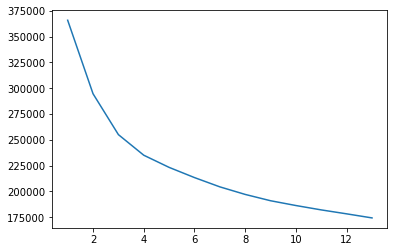

In [92]:
from sklearn.cluster import KMeans
ks = range(1,14)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(db_hotel)
    inertias.append(model.inertia_)

plt.plot(ks, inertias)
# 3 clusters suits best. Check for 4 and 5

In [93]:
# Date with 2 Clusters

df_k2 = db_hotel.copy()
model_k2 = KMeans(n_clusters=2, random_state=100).fit(df_k2)
df_k2['label'] = model_k2.labels_

In [94]:
# Date with 3 Clusters

df_k3 = db_hotel.copy()
model_k3 = KMeans(n_clusters=3, random_state=100).fit(df_k3)
df_k3['label'] = model_k3.labels_

In [95]:
# Data with 4 clusters

df_k4 = db_hotel.copy()
model_k4 = KMeans(n_clusters=4, random_state=100).fit(df_k4)
df_k4['label'] = model_k4.labels_

In [96]:
# Data with 5 clusters

df_k5 = db_hotel.copy()
model_k5 = KMeans(n_clusters=5, random_state=100).fit(df_k5)
df_k5['label'] = model_k5.labels_

In [108]:
# Compare 3 with 4 clusters

dataframe = pd.concat([
#            df_k2.groupby(['label']).mean().transpose(),
#            df_k3.groupby(['label']).mean().transpose(),
#            df_k4.groupby(['label']).mean().transpose(),
           df_k5.groupby(['label']).mean().transpose()
          ], axis=1)
# dataframe.style.apply(lambda x: ["background: #6dedeb" if abs(v) > 0.49 else "" for v in x], axis = 1)
dataframe.style.background_gradient(cmap="Blues", vmin=2.9)

# O que se passa entre cluster 1 e 2 no caso de 4 clusters?
# As Overall Stisfaction, Room e Bar Related são diferentes sendo ambos uma grande percentagem de double rooms
# Ou seja, existe discrepância nos double rooms, sendo os single as melhores pontuações e a pontuação das suites aumenta
# com o decrescer da insatisfação

label,0,1,2,3,4
Comfort,4.30,2.34,2.10,3.02,2.36
ReceptionSchedule,4.21,3.00,2.18,3.79,1.99
FoodDrink,4.19,2.46,2.06,3.80,1.90
Location,4.01,2.84,2.06,3.68,2.37
Wifi,3.72,1.74,3.72,2.85,3.94
Amenities,4.15,2.24,3.88,3.42,2.96
Staff,4.09,1.81,4.24,3.17,3.88
OnlineBooking,4.23,1.95,4.41,2.39,3.61
PriceQuality,4.05,3.36,4.32,2.19,2.59
RoomSpace,3.96,3.32,4.23,2.61,2.63
